# Stroke Data Analysis

Dataset source:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset  
Note: A copy of this dataset is saved as healthcare-dataset-stroke-data.csv

For this project we were provided the following feilds in our dataset:    
* Gender
* Age
* Hypertension
* Heart Disease
* Marital Status
* Work Type
* Residence Type
* Glucose Level
* BMI
* Smoking Status

And will be using them to predict the following field:
* Stroke or no Stroke

**This data will help up predict the probablity of another person having a stroke given their information.**

### Gathering Data into Table  

To gather the data into a table, we used MyPyTable to simply table formation. We loaded the data into a MyPyTable object to be manipulated.

In [1]:
import importlib
import utils
from mypytable import MyPyTable
#from MyPyTable import MyPyTable
stroke_table = MyPyTable()
stroke_table.load_from_file("healthcare-dataset-stroke-data.csv");

header:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


### Dealing With Missing Values  

To deal with the missing N/A values, as well as the unknowns - we removed all rows that contained any of these values as we deemed them unncessary. Giving the class imbalance, we double checked to make sure if we rid of the unknown values that it would not effect the class imbalance too greatly... and we concluded it would not.  

We also concluded there would still be enough data to preform the classifications.

In [2]:
# Remove missing values removes all rows that contain an "N/A" or "Unknown" field
stroke_table.remove_rows_with_missing_values()
# Convert to numeric converts all the numeric values in the table into numeric values (as they were read as strings)
stroke_table.convert_to_numeric()
print("New length of Table:", len(stroke_table.data))

New length of Table: 3364


### Data Classification  

Many of the attributes are string values, and in order to perform the attribute selection with SckiLearns method... they needed to be numerical fields. Therefore we classified the string values as numerical fields as well as transformed the large numerical values into smaller numerical categories as well. Below you can see the classifications that were made.

**Gender:**
* Male: 0
* Female: 1

**Age:**
* <2 years old: 0
* <10 years old: 1
* <30 years old: 3
* <40 years old: 4
* <50 years old: 5
* <60 years old: 6
* <70 years old: 7
* <80 years old: 8
* <90 years old: 9
* Older than 90: 10

**Marital Status:**
* No: 0
* Yes: 1

**Work Status:**
* Never Worked: 0
* Children: 1
* Private: 2
* Self-Employed: 3
* Government-Job: 4

**Residence Type:**
* Urban: 0
* Rural: 1

**Glucose Level:**
* <70: 0
* <140: 1
* <200: 2
* Greater than 200: 3

**BMI:**
* <15: 0
* <20: 1
* <25: 2
* <30: 3
* <40: 4
* Greater than 40: 5

**Smoking Status:**
* Never Smoked: 0
* Formerly Smoked: 1
* Smokes: 2

In [3]:
importlib.reload(utils);
print(stroke_table.data[0]);

[9046.0, 'Male', 67.0, 0.0, 1.0, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1.0]


In [4]:
# First time running, you have to run this cell twice in order to let it catch up and print the classification as it is correctly
classified_data = utils.classify_stroke_data(stroke_table.data)
print(classified_data[0])

[9046.0, 'Male', 67.0, 0.0, 1.0, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1.0]


### Remove Irrelevant Columns  

Because the ID column is not neccessary in our classification, we removed it so that ID would not be a field in deciding whether or not someone will have a stroke. As there is no correlation between ID number, and result.

In [5]:
classified_data = utils.remove_id_column(classified_data)
print(classified_data[0])

['Male', 67.0, 0.0, 1.0, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1.0]


In [6]:
stroke_table.data = classified_data
# Getting rid of one row with other gender option
del stroke_table.data[2055]

In [7]:
stroke_table.save_to_file('newfile.csv')

### Seperate Data into X and y Trains

In [8]:
del stroke_table.column_names[0]
X_train, y_train = utils.get_trains_seperated(classified_data, stroke_table.column_names, "stroke")

### Attribute Selection with SciLearn

We used SkiLearns SelectKBest Algorithm in order to select the best attributes with the largest correlation to the resulting outcome.  



In [9]:
from sklearn.feature_selection import SelectKBest
print(stroke_table.column_names)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [10]:
X_best = SelectKBest(k=6).fit_transform(X_train, y_train)
print(X_best)
print(len(X_best))

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: could not convert string to float: 'Male'

In [15]:
# Use 6 attributes the algorithm selected to create the new header:
new_header = ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi']

### Attribute Selection Without SciLearn

We selected these attributes to use from the data set because we could identify the largest correclations between those upon inital scanning throug the set. 

While grabbing the inital columns for these attributes we wanted to make sure to keep them all the same length and raw so that we can make sure to keep every persons profiles intact across the columns. For this we used a simple function to grab the entire column without cleaning out and NA values so we can send them into a new file. 

In [17]:
selected_cols = ['gender', 'age', 'heart_disease', 'ever_married', 'work_type', 'bmi', 'stroke']
selected_data = [[]]
gender_col = utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "gender")
selected_data.append(gender_col)
age_col =  utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "age")
selected_data.append(age_col)
heart_disease_col =  utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "heart_disease")
selected_data.append(heart_disease_col)
married_col = utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "ever_married")
selected_data.append(married_col)
work_type_col = utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "work_type")
selected_data.append(work_type_col)
bmi_col = utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "bmi")
selected_data.append(bmi_col)
stroke_col = utils.get_col_no_clean(stroke_table.data, stroke_table.column_names, "stroke")
selected_data.append(stroke_col)

stroke_data = MyPyTable(selected_cols,selected_data)
#stroke_data.save_to_file("refined_cols.csv")
   

We will use a frequency diagram to look at ditrubutions within the dataset to being understanding it further.

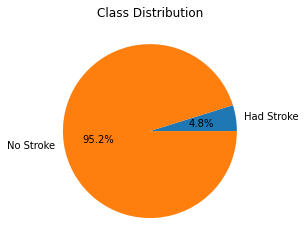

Number of data entries:  3363
Number Had Stroke:  162.0
Number Did Not Have Stroke:  3201.0


In [18]:
importlib.reload(utils)
import plot_utils

title = "Class Distribution"
utils.convert_to_numeric(stroke_col)
stroke_vals = ["Had Stroke", "No Stroke"]
percents = []
num_strokes = sum(stroke_col)

num_entries = len(stroke_col)
num_no_strokes = num_entries - num_strokes


stroke_percent = num_strokes / num_entries
percents.append(stroke_percent)
no_stroke_percent = num_no_strokes / num_entries
percents.append(no_stroke_percent)

plot_utils.pie_chart(stroke_vals, percents, title)

print("Number of data entries: ", num_entries)
print("Number Had Stroke: ", num_strokes)
print("Number Did Not Have Stroke: ", num_no_strokes)



### Class Imbalance

As shown in the distribution pie chart, the class distribution is extremely skewed to the non-stoke side where there are 4,861 cases of no stroke compared to 249 cases that resulted in stroke. While this is good news that there were not nearly as many people that had a stroke, this is something we will have to be very careful with throughout the rest of our data exploration and classifications.

#### Reseaching   
Looking at a few sources on dealing with class imbalance so far we have determined that two of the most relevant approaches we should take 

## Data Classification with Our Classifiers

We plan to use a couple of our own classifiers, along with the RandomForestClassifier in order to test which classifier will be the most accurate to use in our final data classification.

In [11]:
# Import Classifiers
from myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier
import myclassifiers
importlib.reload(myclassifiers);

### KNN Classifier

In [20]:
knn_classifier = MyKNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

In [21]:
knn_accuracy, knn_error_rate = utils.get_accuracy_and_error_rate(knn_classifier)
print("kNN Accuracy:", knn_accuracy)
print("kNN Error Rate:", knn_error_rate)# import myevaluation as myevaluation

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### Decision Tree Classifier

In [22]:
DT_classifier = MyDecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)

In [23]:
DT_accuracy, DT_error_rate = utils.get_accuracy_and_error_rate(DT_classifier)
print("Decision Tree Accuracy:", DT_accuracy)
print("Decision Tree Error Rate:", DT_error_rate)

Decision Tree Accuracy: 0.9940529289325007
Decision Tree Error Rate: 0.005947071067499254


Based on the severe class imbalance of the data, having results around 95% really don't tell us much about the data and the true accuracy of the classifiers above. In order to account for this, we are going to use **downscaling** to create a much more balanced class distribution! To give us a good amount of data points to still work with we will reinsert the rows from the stroke column that we removed for being "unknown" that will take our positive stoke cases from 162 back up to 250 so we will have aroun 500 rows to work with to give us more interesting and reliable results from our classifiers. 

### Invesitgating unknowns in the "smoking_status" column to be able to use more data points  
This allows us to determine if there is a clear majority so we can assign the unknonws using a majority label

header:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


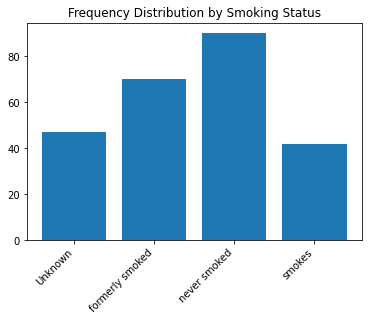

In [13]:
import plot_utils
# made a second mypytable object to try different method of cleaning 
stroke_table_2 = MyPyTable()
stroke_table_2.load_from_file("healthcare-dataset-stroke-data.csv");

#only looking at first 245 columns where the person did have a stroke
smoke_values, smoke_counts = utils.get_frequencies(stroke_table_2.data[:249], stroke_table_2.column_names, "smoking_status")
smoke_title = "Frequency Distribution by Smoking Status"
plot_utils.bar_chart(smoke_values, smoke_counts, smoke_title)

This chart demonstrates that there is no overwhelming majority of "smoking_status" within the dataset of all the positive stroke cases and therefore would not be a good way to reassign the unknown values.  


Instead, we will try using the knn classifier and use a rows nearest neighbors to re-assign its smoking status.  


For this we will first reassign the "unknown" values in the 250 rows where the person did expereince a stroke, and then we will grab an equal number of no strokes rows at random so that there is no class imbalance. We will run through these rows to see if there are any unknowns and then will be able to reassign those values based on their neriest neghbors before testing the new set in our classifiers! 

In [14]:
importlib.reload(myclassifiers);
#using knn 
# added new mypytalbe function just to remove NA values (modifed remove all) 
stroke_table_2.remove_rows_with_na_only()

#TODO need to remove row with "other" in gender col

stroke_table_2.convert_to_numeric()
print("New length of Table:", len(stroke_table_2.data))

#classifying into the numeric values 
classified_data_2 = utils.classify_stroke_data(stroke_table_2.data)
#removing unused col
classified_data_2 = utils.remove_id_column(classified_data_2)
stroke_table_2.data = classified_data_2

#use only rows where person did have a stroke? [:249]
smoke_X_train, smoke_y_train = utils.get_trains_seperated(classified_data[:249], stroke_table_2.column_names, "smoking_status")

knn_for_smoking = MyKNeighborsClassifier()
knn_for_smoking.fit(smoke_X_train, smoke_y_train)

'''
later
knn_smoking_accuracy, knn_smoking_error_rate = utils.get_accuracy_and_error_rate(knn_for_smoking)
'''


New length of Table: 4909


'\nknn_smoking_accuracy, knn_smoking_error_rate = utils.get_accuracy_and_error_rate(knn_for_smoking)\nprint("kNN Accuracy:", knn_smoking_accuracy)\nprint("kNN Error Rate:", knn_smoking_error_rate)# import myevaluation as myevaluation\n'

Making the no stroke half of the set:

In [ ]:
# Randomly select 250 of the no stroke rows
import random

# grab 250 random rows from [250:] in stroke_table_2.data
# use groupby with smoking status to see how many (if any) of those rows are unknowns

# use knn to reassign those rows based on their nearest neighbors 
# ... test the classification!

### Random Forest Classifier

Random Forest Classifier soon to come...